# Read data

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("AvgAlKras.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43699 entries, 0 to 43698
Data columns (total 2 columns):
Unnamed: 0    43699 non-null object
 AlKras       43699 non-null float64
dtypes: float64(1), object(1)
memory usage: 682.9+ KB


# Data split

In [2]:
import math

def split_data(data, frame_size, n_frames):
    X, y = [], []
    for i in range(len(data)):
        # find the end of this pattern
        end_ix = i + frame_size
        # check if we are beyond the sequence
        if end_ix > len(data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [3]:
# 
frame_size = 23
n_frames = math.floor(len(data) / frame_size)
n_features = 1

X, y = split_data(data.iloc[:,1].values, frame_size, n_frames)
X = X.reshape(-1,frame_size,n_features)
print('Data type: ', type(X))
print('X shape:', X.shape, 'y shape:', y.shape)

Data type:  <class 'numpy.ndarray'>
X shape: (43676, 23, 1) y shape: (43676,)


# Data split

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

print(np.isnan(X_train).any())
print(np.isnan(y_train).any())
print(np.isnan(X_val).any())
print(np.isnan(y_val).any())
print(np.isnan(X_test).any())
print(np.isnan(y_test).any())

False
False
False
False
False
False


# LSTM

In [5]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Flatten

Using TensorFlow backend.


# Construct model

In [6]:
model = Sequential()

model.add(LSTM(40,activation="tanh",return_sequences=True, input_shape=(frame_size, n_features)))
model.add(Dropout(0.15))

model.add(LSTM(40,activation="tanh",return_sequences=False))
model.add(Dropout(0.15))

#model_daily.add(Dense(128,activation="relu", input_shape=(train_x.shape[1],1)))
#model_daily.add(Dropout(0.1))
#model_daily.add(Dense(64,activation="relu"))
#model_daily.add(Dropout(0.1))
#model_daily.add(Dense(32,activation="relu"))
#model_daily.add(Dropout(0.1))
#model_daily.add(Flatten())

#model_daily.add(Dense(16,activation="relu"))
#model_daily.add(Dropout(0.1))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mae")

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 23, 40)            6720      
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 40)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 40)                12960     
_________________________________________________________________
dropout_2 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 19,721
Trainable params: 19,721
Non-trainable params: 0
_________________

# Train model

In [7]:
history = model.fit(x=X_train,y=y_train, batch_size=8740, epochs=100, validation_data=(X_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 27952 samples, validate on 6988 samples
Epoch 1/10
27952/27952 [==============================] - 8s 291us/step - loss: 58.6556 - val_loss: 58.7887
Epoch 2/10
27952/27952 [==============================] - 6s 227us/step - loss: 58.2043 - val_loss: 58.2731
Epoch 3/10
27952/27952 [==============================] - 6s 222us/step - loss: 57.6625 - val_loss: 57.6430
Epoch 4/10
27952/27952 [==============================] - 6s 224us/step - loss: 57.0035 - val_loss: 56.9032
Epoch 5/10
27952/27952 [==============================] - 6s 223us/step - loss: 56.2566 - val_loss: 56.1868
Epoch 6/10
27952/27952 [==============================] - 6s 222us/step - loss: 55.5590 - val_loss: 55.5596
Epoch 7/10
27952/27952 [==============================] - 6s 221us/step - loss: 54.9428 - val_loss: 54.9563
Epoch 8/10
27952/27952 [==============================] - 6s 222us/step - loss: 54.3250 - val_loss: 54.3069
Epoch 9/10
27952/27952 [===============

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

# Test model

In [9]:
predictions = model.predict(X_test)

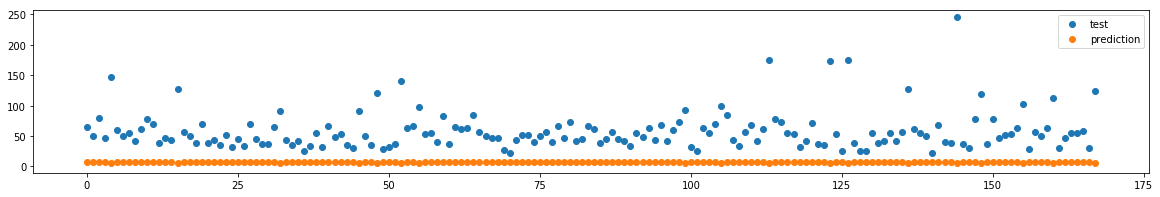

In [14]:
limit = 168
x = list(range(len(y_test[:limit])))
plt.figure(figsize=(20,3))
plt.scatter(x, y_test[:limit], label='test')
plt.scatter(x, predictions[:limit], label='prediction')
plt.legend()